In [1]:
!pip install keras
!pip install tensorflow
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

In [43]:
data_set = pd.read_csv('Foreign_Exchange_Rates.csv', na_values='ND')
data_set

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94


In [44]:
data_set.shape

(5217, 24)

In [45]:
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [46]:
data_set.isnull().sum()

,0
Unnamed: 0,0
Time Serie,0
AUSTRALIA - AUSTRALIAN DOLLAR/US$,198
EURO AREA - EURO/US$,198
NEW ZEALAND - NEW ZELAND DOLLAR/US$,198
UNITED KINGDOM - UNITED KINGDOM POUND/US$,198
BRAZIL - REAL/US$,198
CANADA - CANADIAN DOLLAR/US$,198
CHINA - YUAN/US$,197
HONG KONG - HONG KONG DOLLAR/US$,198


In [47]:
data_set.interpolate(inplace=True)
data_set.isnull().sum()

<ipython-input-47-2ce32fec3a3a>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_set.interpolate(inplace=True)


,0
Unnamed: 0,0
Time Serie,0
AUSTRALIA - AUSTRALIAN DOLLAR/US$,0
EURO AREA - EURO/US$,0
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0
UNITED KINGDOM - UNITED KINGDOM POUND/US$,0
BRAZIL - REAL/US$,0
CANADA - CANADIAN DOLLAR/US$,0
CHINA - YUAN/US$,0
HONG KONG - HONG KONG DOLLAR/US$,0


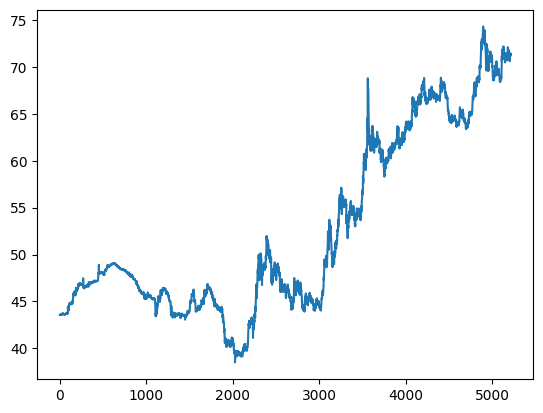

In [48]:
plt.plot(data_set['INDIA - INDIAN RUPEE/US$'])

In [49]:
df = data_set['INDIA - INDIAN RUPEE/US$']
df

,INDIA - INDIAN RUPEE/US$
0,43.550
1,43.550
2,43.550
3,43.550
4,43.550
...,...
5212,71.255
5213,71.280
5214,71.450
5215,71.300


In [50]:
df = np.array(df).reshape(-1,1)
df

array([[43.55],
       [43.55],
       [43.55],
       ...,
       [71.45],
       [71.3 ],
       [71.36]])

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
df = scaler.fit_transform(df)
df

array([[0.14142259],
       [0.14142259],
       [0.14142259],
       ...,
       [0.91966527],
       [0.91548117],
       [0.91715481]])

In [53]:
train = df[:4800]
test = df[4800:]

print(train.shape)
print(test.shape)

(4800, 1)
(417, 1)


In [54]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [55]:
look_back = 2

x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)

(4797, 2)
(4797,)
[[0.14142259 0.14142259]
 [0.14142259 0.14142259]
 [0.14142259 0.14142259]
 ...
 [0.82454672 0.8264993 ]
 [0.8264993  0.82454672]
 [0.82454672 0.83403068]]
[0.14142259 0.14142259 0.14142259 ... 0.82454672 0.83403068 0.83235704]


In [56]:
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)
print(x_test)
print(y_test)

(414, 2)
(414,)
[[0.81729428 0.81729428]
 [0.81729428 0.8083682 ]
 [0.8083682  0.80669456]
 [0.80669456 0.79525802]
 [0.79525802 0.79693166]
 [0.79693166 0.79888424]
 [0.79888424 0.79191074]
 [0.79191074 0.80111576]
 [0.80111576 0.8111576 ]
 [0.8111576  0.8083682 ]
 [0.8083682  0.80892608]
 [0.80892608 0.81227336]
 [0.81227336 0.81283124]
 [0.81283124 0.8251046 ]
 [0.8251046  0.82622036]
 [0.82622036 0.83179916]
 [0.83179916 0.8251046 ]
 [0.8251046  0.82175732]
 [0.82175732 0.82008368]
 [0.82008368 0.82594142]
 [0.82594142 0.8320781 ]
 [0.8320781  0.84100418]
 [0.84100418 0.8460251 ]
 [0.8460251  0.8362622 ]
 [0.8362622  0.84518828]
 [0.84518828 0.83960948]
 [0.83960948 0.84393305]
 [0.84393305 0.84825662]
 [0.84825662 0.84574616]
 [0.84574616 0.841841  ]
 [0.841841   0.8446304 ]
 [0.8446304  0.84295676]
 [0.84295676 0.83793584]
 [0.83793584 0.83570432]
 [0.83570432 0.84016736]
 [0.84016736 0.83514644]
 [0.83514644 0.84072524]
 [0.84072524 0.85160391]
 [0.85160391 0.84407252]
 [0.84407

In [58]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[[0.14142259]
  [0.14142259]]

 [[0.14142259]
  [0.14142259]]

 [[0.14142259]
  [0.14142259]]

 ...

 [[0.82454672]
  [0.8264993 ]]

 [[0.8264993 ]
  [0.82454672]]

 [[0.82454672]
  [0.83403068]]]
[[[0.81729428]
  [0.81729428]]

 [[0.81729428]
  [0.8083682 ]]

 [[0.8083682 ]
  [0.80669456]]

 [[0.80669456]
  [0.79525802]]

 [[0.79525802]
  [0.79693166]]

 [[0.79693166]
  [0.79888424]]

 [[0.79888424]
  [0.79191074]]

 [[0.79191074]
  [0.80111576]]

 [[0.80111576]
  [0.8111576 ]]

 [[0.8111576 ]
  [0.8083682 ]]

 [[0.8083682 ]
  [0.80892608]]

 [[0.80892608]
  [0.81227336]]

 [[0.81227336]
  [0.81283124]]

 [[0.81283124]
  [0.8251046 ]]

 [[0.8251046 ]
  [0.82622036]]

 [[0.82622036]
  [0.83179916]]

 [[0.83179916]
  [0.8251046 ]]

 [[0.8251046 ]
  [0.82175732]]

 [[0.82175732]
  [0.82008368]]

 [[0.82008368]
  [0.82594142]]

 [[0.82594142]
  [0.8320781 ]]

 [[0.8320781 ]
  [0.84100418]]

 [[0.84100418]
  [0.8460251 ]]

 [[0.8460251 ]
  [0.8362622 ]]

 [[0.8362622 ]
  [0.84518828]]

 [

In [59]:
print(x_train.shape)
print(x_test.shape)

(4797, 2, 1)
(414, 2, 1)


In [60]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(look_back,1)))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer='adam', loss = 'mse')

In [63]:
model.fit(x_train,y_train, epochs = 5, batch_size=1)

Epoch 1/5
4797/4797 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0101
Epoch 2/5
4797/4797 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1.0989e-04
Epoch 3/5
4797/4797 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 1.1861e-04
Epoch 4/5
4797/4797 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 1.2268e-04
Epoch 5/5
4797/4797 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 9.4538e-05


In [64]:
scaler.scale_

array([0.027894])

In [65]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[67.43112 ]
 [67.26451 ]
 [67.075645]
 [66.83326 ]
 [66.663315]
 [66.72898 ]
 [66.63374 ]
 [66.68223 ]
 [67.03084 ]
 [67.15607 ]]


In [66]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[67.46]
 [67.4 ]
 [66.99]
 [67.05]
 [67.12]
 [66.87]
 [67.2 ]
 [67.56]
 [67.46]
 [67.48]]


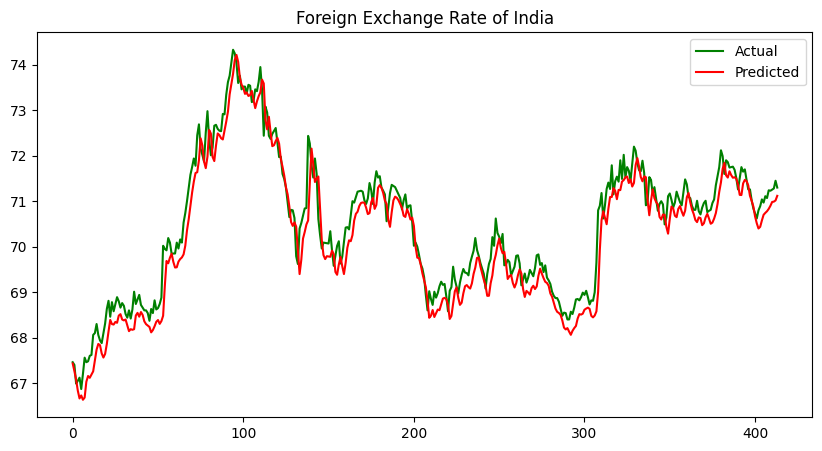

In [67]:
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.18822723226936416